<a href="https://colab.research.google.com/github/MartinezKyle/DATA103/blob/main/linear_regression_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning: Linear Regression Homework

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

<hr>

Submitted by:
 - MARTINEZ, Kyle
 - FERNANDEZ, Chelsea 
 - DECULAWAN, Ryan
 - PPOSADAS, Annika
 - HAUSCHILD, Melanie


## Requirements

 - Implement linear regression from scratch using the functions provided. You *may* refer to the code given in the lecture to help you out in the implementation.
 - Replace `raise NotImplementedError` with your code.
 - You may only use the <a href="https://docs.python.org/3/library/">Python Standard libraries</a>, numpy, pandas, and matplotlib (if you will be doing visualization although that's not required). `collections` is an example of Python Standard Library.
 - **Do not remove the assert/test cells.**
 - You have to create a writeup on the code you've written.
 - Cite references if there are any. If you will be using the code I've given, cite it. If you got help from your peers, cite it as well.
 - Submit the link for your copy of this Google Colaboratory notebook. **Make sure it's public**. You may use incognito to see if the link is accessible.

<hr>

## Grading Criteria

|Criteria|Points|
|---|---|
|Code|20|
|Writeup|5|


## Core functions

Implement the functions below.


**Loss function:**
$$l(\vec{\theta}) = \frac{1}{2n} (X \vec{\theta} - \vec{y})^T(X \vec{\theta} - \vec{y})$$
---
**Gradient function:**
$$\dfrac{\partial}{\partial \vec{\theta} } l( \vec{\theta} ) = \frac{1}{n} (X \vec{\theta} - \vec{y})^T X$$
---
**Weight update rule:**
$$\vec{\theta} := \vec{\theta} - \frac{\alpha}{n}(X \vec{\theta} - \vec{y})^T X$$
---

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from numpy.testing import assert_almost_equal

from sklearn import datasets
from sklearn.model_selection import train_test_split

sns.set_style('darkgrid')
sns.set_palette('Set2')

def compute_loss(X:np.array, theta:np.array, y:np.array) -> float:
  '''
  Compute mean-squared error loss

  Parameters
  ---
  X : input matrix
  theta : weights vector
  y : output vector

  Returns
  ---
  loss : float
  '''
  # insert code here
  loss = (1 / (2 * len(y))) * np.dot((X.dot(theta) - y).T, X.dot(theta) - y)
  return loss

def compute_gradient(X:np.array, theta:np.array, y:np.array) -> np.array:
  '''
  Compute the gradient of mean-squared error loss

  Parameters
  ---
  X : input matrix
  theta : weights vector
  y : output vector

  Returns
  ---
  gradient : np.array
  '''
  # insert code here
  gradient = (1 / len(y)) * np.dot(X.T, (X.dot(theta) - y))
  return gradient

def weight_update(X:np.array, theta:np.array, y:np.array, alpha:float) -> np.array:
  '''
  Perform 1 iteration of gradient descent and return the updated weights

  Parameters
  ---
  X : input matrix
  theta : weights vector
  y : output vector
  alpha : learning rate

  Returns
  ---
  theta : np.array
  '''
  # insert code here
  theta = theta - alpha * compute_gradient(X, theta, y)
  return theta

### Test Cases

In [6]:
# DO NOT EDIT THIS CELL
# test cases for loss function

X = np.array([[1, 2], [1, 4]])
theta = np.array([0, 2]) # initial weights
y = np.array([4, 8])
loss = compute_loss(X, theta, y)
assert_almost_equal(loss, 0)

y = np.array([5, 9])
loss = compute_loss(X, theta, y)
assert_almost_equal(loss, 0.5)

y = np.array([6, 10])
loss = compute_loss(X, theta, y)
assert_almost_equal(loss, 2)

print('Passed all tests!')

Passed all tests!


In [7]:
# DO NOT EDIT THIS CELL
# test cases for gradient function

X = np.array([[1, 2], [1, 4]])
theta = np.array([0, 2]) # initial weights
y = np.array([4, 8])
gradient = compute_gradient(X, theta, y)
assert_almost_equal(gradient, [0, 0])

y = np.array([5, 9])
gradient = compute_gradient(X, theta, y)
assert_almost_equal(gradient, [-1, -3])

y = np.array([6, 10])
gradient = compute_gradient(X, theta, y)
assert_almost_equal(gradient, [-2, -6])

print('Passed all tests!')

Passed all tests!


In [8]:
# DO NOT EDIT THIS CELL
# test cases for weight update
X = np.array([[1, 2], [1, 4]])
theta = np.array([0, 2]) # initial weights
y = np.array([6, 10])
alpha = 1e-1

# iteration 1
theta = weight_update(X, theta, y, alpha)
assert_almost_equal(theta, [0.2, 2.6])
loss = compute_loss(X, theta, y)
print(f'Current loss: {loss}')

# iteration 2
theta = weight_update(X, theta, y, alpha)
assert_almost_equal(theta, [0.2, 2.54])
loss = compute_loss(X, theta, y)
print(f'Current loss: {loss}')

# iteration 3
theta = weight_update(X, theta, y, alpha)
assert_almost_equal(theta, [0.218, 2.54])
loss = compute_loss(X, theta, y)
print(f'Current loss: {loss}')

# iteration 4
theta = weight_update(X, theta, y, alpha)
assert_almost_equal(theta, [0.2342, 2.5346])
loss = compute_loss(X, theta, y)
print(f'Current loss: {loss}')

# iteration 5
theta = weight_update(X, theta, y, alpha)
assert_almost_equal(theta, [0.2504 , 2.52974])
loss = compute_loss(X, theta, y)
print(f'Current loss: {loss}')

print('Passed all tests!')

Current loss: 0.1799999999999998
Current loss: 0.1619999999999998
Current loss: 0.158922
Current loss: 0.15602057999999977
Current loss: 0.15317310600000017
Passed all tests!


In [14]:
# DO NOT EDIT THIS CELL
# test cases for weight update

def prepare_X_theta(X):
  np.random.seed(42)

  b = np.ones(X.shape[0]).reshape(-1,1)
  X = np.concatenate([b, X], axis=1)
  weight_multiplier = 1e-1
  theta = np.random.random((X.shape[1])) * weight_multiplier

  return X, theta

def rescale_data(data:np.array):
  data_mean, data_std = data.mean(), data.std()
  data = (data-data_mean)/data_std
  return data, data_mean, data_std


# datasets.load_boston() is deprecated as of Pandas 1.2.0
# X, y = datasets.load_boston(return_X_y=True)

# Using the source from the documentation to load the data instead
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r'\s+', skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X, X_mean, X_std = rescale_data(X_train)
X, initial_theta = prepare_X_theta(X)
alpha = 1e-2
# print(f'Initial weights: {initial_theta}')
theta = weight_update(X, initial_theta, y_train, alpha)
expected_theta = [0.2655001978868943,
 -0.011637618099986924,
 -0.014123455625562178,
 -0.03509131258449641,
 -0.09449554944194578,
 -0.09379449048202543,
 -0.09411709029610936,
 0.07867445278043156,
 -0.04378356773810579,
 -0.026778645675046203,
 0.4817274450351354,
 0.015021167271587685,
 0.5564536845613424,
 -0.07268059253241976]
assert_almost_equal(theta, expected_theta)

X, X_mean, X_std = rescale_data(X_test)
X, initial_theta = prepare_X_theta(X)
alpha = 1e-3
# print(f'Initial weights: {initial_theta}')
theta = weight_update(X, initial_theta, y_test, alpha)
expected_theta = [0.05895544331503736,
 0.0850801505834033,
 0.0651786789752611,
 0.05102327287892467,
 0.005281846029592316,
 0.005345543649288255,
 -0.0036093435904278786,
 0.08530466054873793,
 0.050357930779005876,
 0.061780423379101244,
 0.04794669159781649,
 0.08934150147127123,
 0.1261801950624165,
 0.012534315048557546]
assert_almost_equal(theta, expected_theta)

print('Passed all tests!')

Passed all tests!


## Gradient Descent

The **Gradient Descent algorithm** is as follows:

- Initialize starting weights.
- While not coverging (change in loss is too small or exceeded max. number of iterations)
 - compute loss
 - compute gradient
 - update weights


 I have already done the initialization of weights and data preparation. Kindly complete the rest of the gradient descent implementation.

 > **Extra information:** You might notice that there's rescaling of data that I have included in the implementation. This helps the model to converge properly. Not doing so for this particular dataset causes the model to overshoot--the values will blow up. There are other ways of handling the said issue like regularization and different learning rate value. Through experimentation, I was able to determine that `alpha < 1e-6` will prevent this problem, but I won't be doing that for the code below.

In [10]:
def gradient_descent(X:np.array, y:np.array, alpha:float,
                     max_iters:int=100, tolerance:float=1e-4) -> dict:
  '''
  Perform gradient descent.
  Do early stopping if any of the following applies:
   - current absolute change in loss < tolerance
   - current iteration number > max_iters

  Parameters
  ---
  X : input matrix
  y : output vector
  alpha : learning rate
  max_iters : maximum number of iterations
  tolerance : threshold for change in loss

  Returns
  ---
  model -> dict
    dict containing the following key-value pairs: losses, theta.
    Ex. {'losses': [100, 19.5, 0.3], 'theta': [0, 1, 2]}
  losses -> list
    list of loss values for each iteration
  theta -> np.array
    final weights
  '''
  X, theta = prepare_X_theta(X)
  losses = []

  initial_loss = compute_loss(X, theta, y)

  # insert code here
  for i in range(max_iters):
    theta = weight_update(X, theta, y, alpha)
    loss = compute_loss(X, theta, y)
    losses.append(loss)
    if (i > 0 and abs(losses[-1] - losses[-2]) < tolerance) or (i == 0 and abs(loss - initial_loss) < tolerance):
      break

  model = {'losses': losses, 'theta': theta}
  return model

### Test Cases

In [11]:
# DO NOT EDIT THIS CELL

# datasets.load_boston() is deprecated as of Pandas 1.2.0
# X, y = datasets.load_boston(return_X_y=True)

# Using the source from the documentation to load the data instead
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r'\s+', skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
X, X_mean, X_std = rescale_data(X)

alpha = 1e-1
max_iters = 20
tolerance = 1e-4
model_results = gradient_descent(X, y, alpha, max_iters, tolerance)
losses, theta = model_results['losses'], model_results['theta']

assert_almost_equal(losses, [77.084210963635, 56.67394196766476, 51.52731732318001, 48.26732400517173, 45.759552727473064,
                             43.78617787900164, 42.22536177143829, 40.985708579569845, 39.996338207983555, 39.2021072682085,
                             38.560101467675665, 38.036921347277804, 37.606571301451275, 37.24881702637918, 36.94790739639875,
                             36.69157990965588, 36.47028678861529, 36.27659277987291, 36.104706559257295, 35.950116099931904])

assert_almost_equal(theta, [3.4620499831397646, -1.788487463316586, -0.358811913753914, -1.6892995163351336, -1.6308230134470887,
                            -1.629553747949157, -1.4394623084383056, -1.0611705208417919, -1.4540364646948567, -1.6863420600067505,
                            -0.4884603258917829, -1.2533551440249076, 6.720557598031844, -1.912947973969994])

In [12]:
# DO NOT EDIT THIS CELL

# datasets.load_boston() is deprecated as of Pandas 1.2.0
# X, y = datasets.load_boston(return_X_y=True)

# Using the source from the documentation to load the data instead
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r'\s+', skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, X_mean, X_std = rescale_data(X_train)

alpha = 1e-1
max_iters = 20
tolerance = 1e-4
model_results = gradient_descent(X, y_train, alpha, max_iters, tolerance)
losses_train, theta = model_results['losses'], model_results['theta']

assert_almost_equal(losses_train, [78.19148474471318, 57.4248537235751, 52.30038919989225, 49.0782902807199, 46.60174245378833,
                             44.65324381172846, 43.11239070938216, 41.88895936729907, 40.91296649543095, 40.129950694692674,
                             39.49751574268521, 38.982655472310405, 38.55967265179523, 38.20855918721551, 37.91373532955097,
                             37.66306831372921, 37.447108497924596, 37.25849479785236, 37.09149189470678, 36.941630011368105])

assert_almost_equal(theta, [3.436935387634544, -1.7986772621563663, -0.4893497276576043, -1.6778979200767734, -1.6202834477313934,
                            -1.6197519858502838, -1.425216918608845, -0.9421119001849715, -1.4461860762479994, -1.693531503872381,
                            -0.47233074152084514, -1.2490723640659451, 6.780557354417374, -1.9252216307880679])

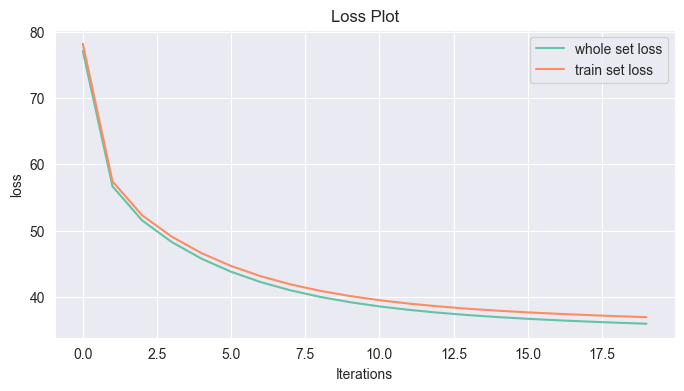

In [13]:
# DO NOT EDIT THIS CELL

fig, (ax1) = plt.subplots(1, 1, figsize=(8,4), dpi=100)

ax1.plot(losses, label='whole set loss')
ax1.plot(losses_train, label='train set loss')

ax1.set_title('Loss Plot')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('loss')

plt.legend()
plt.show()

## Writeup

Put your analysis here...

 - **How does the model work?**
    This model performs linear regression using gradient descent to minimize the the mean squared error of the actual and predicted values. In the gradient descent function, it iteratively updates the weights to get the gradient of the loss function to get the local minimum and reduce the error. 
                                                        
 - **What biases/assumptions does the algorithm have?**
   Gradient Descent is sensitive to the learning rate and feature scaling as we tune it to get the most effective convergence. Furthermore, this model is prone to overfitting if used without regularization. Careful tuning of the learning rate, early stopping criteria, and feature preprocessing are essential for robust performance.

 - **What were the challenges as you were implementing it?**
    Implementing early stopping for gradient descent. There may be cases that the condition might not be sensitive enough to detect smaller imprvements in loss values, especially when the loss plateaus or decreases slowly.

 - **Was there anything surprising about the results of the test cases? Check the weights and loss.**
The test results were mostly as expected, but it was somewhat surprising that the training set loss and the whole set loss were so similar. This indicates that the model generalizes well to the entire dataset and is not overfitting the training data. This could be due to the fact that the dataset used was relatively simple, and the gradient descent implementation worked effectively in optimizing the weights.
The fact that both the training and overall loss curves have a steady decline without large fluctuations indicates that the learning rate was well-tuned for this particular task. A poor learning rate would have resulted in more erratic loss behavior or a very slow convergence.

   In addition, when comparing the weights from the whole set versus the train set, we can see that all values are similar or close in values except for the 3rd parameter (−0.35 in the whole dataset vs. −0.48 in the train set) and the 13th parameter (6.72 in the whole dataset vs. 6.78 in the train set). This shows how a training set can impact a model's ability to generalize from the given data.



## References

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href>> or <href>jude.teves@dlsu.edu.ph</href></sup><br>
